In [2]:
import os
from datasets import load_dataset
from PIL import Image
import pandas as pd
import torch

In [3]:
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.max_colwidth', None) # Show full content of each column (no truncation)
pd.set_option('display.width', None)

In [5]:
dataset = load_dataset("ahmedheakl/arocrbench_hindawi",split="train")

In [6]:
dataset

Dataset({
    features: ['image', 'text', 'source'],
    num_rows: 200
})

In [7]:
results = []
for sample in dataset:
    image = sample["image"]  # Already a PIL Image object
    if image.mode != "RGB":
        image = image.convert("RGB")
    ground_truth = sample["text"]
    results.append({
        "image": image,
        "ground_truth": ground_truth,
        "qwenv2.5_3B": None,
        
    })
print(f"Initialized results with {len(results)} samples.")

Initialized results with 200 samples.


## Qwenvl2.5 3B 

In [8]:
import torch 
torch.cuda.empty_cache()

In [9]:
from transformers import AutoProcessor, AutoModelForImageTextToText

processor = AutoProcessor.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct",use_fast=True)

model = AutoModelForImageTextToText.from_pretrained("Qwen/Qwen2.5-VL-3B-Instruct",torch_dtype="auto",device_map="cuda:0")

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [10]:
from PIL import Image 
import requests

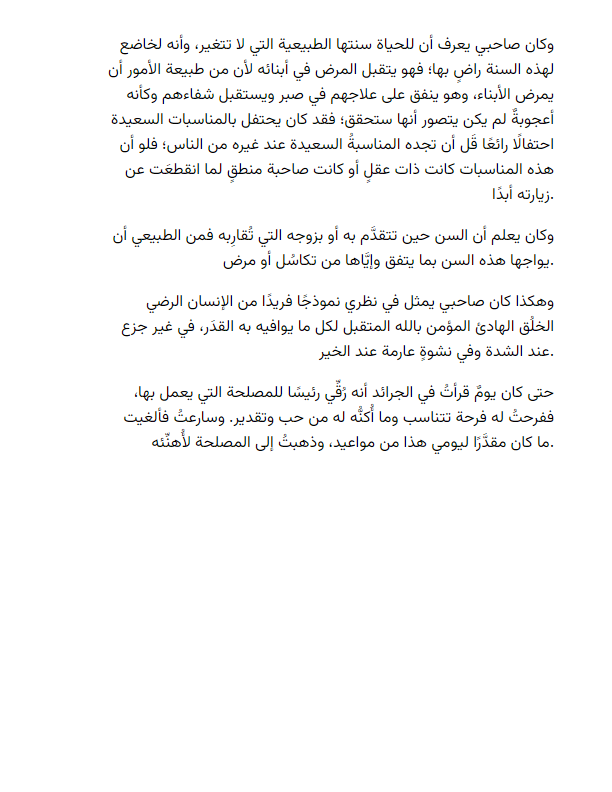

In [11]:
image = dataset[2]['image']
image

In [12]:
dataset[2]['answer']

KeyError: 'answer'

In [13]:
messages = [
    {
        "role": "user",
        "content": [
            {
                "type": "image",
            },
            {
                "type": "text",
                "text": "extract the arabic text in the following image"
            }
        ]
    }
]

text_prompt = processor.apply_chat_template(messages, add_generation_prompt=True)



In [14]:
def qwen_extract_ocr(text_prompt,image):
    
    inputs = processor(
        text = [text_prompt],
        images = [image],
        padding = True,
        return_tensors = "pt"
    )

    inputs = inputs.to("cuda")

    output_ids = model.generate(**inputs, max_new_tokens=1024)

    generated_ids = [
        output_ids[len(input_ids) :]
        for input_ids, output_ids in zip(inputs.input_ids, output_ids)
    ]

    output_text = processor.batch_decode(
        generated_ids, skip_special_tokens=True, clean_up_tokenization_spaces=True
    )
    return output_text


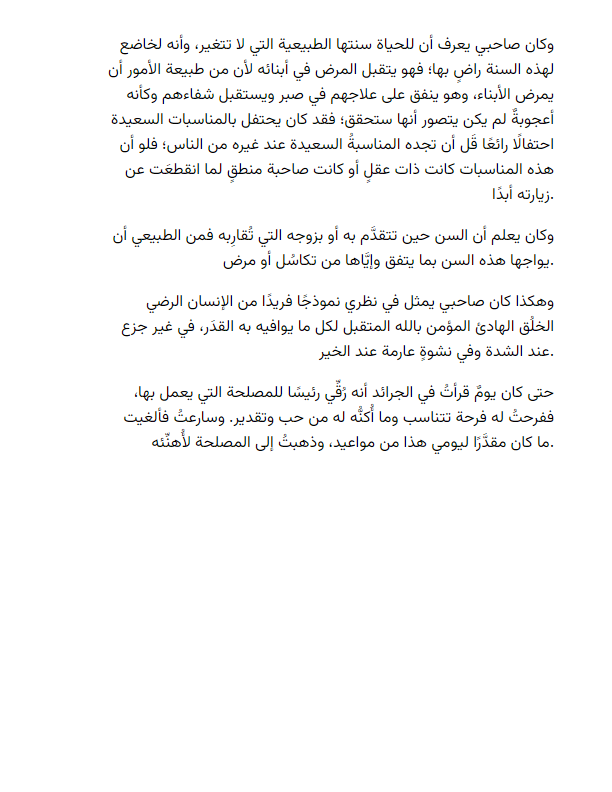

In [15]:
image = dataset[2]['image']
image

In [16]:
qwen_extract_ocr(text_prompt,image=dataset[2]['image'])


['Here is the Arabic text extracted from the image:\n\n```\nوكان صاحبي يعرف أن للحياة سنتها الطبيعية التي لا تتغير، وأنه لخاضع لهذه السنة راض بها؛ فهو يتقبل المرض في أبنائه لأن من طبيعة الأمور أن يمرض الأبناء، وهو يتفق على علاجهم في صبر وبستقبل شفاءهم وكان أهجوته لم يكن يتصور أنها ستحقق؛ فقد كان يحتفل بالمناسبات السعيدة احتفالاً إنما قل أن تجده المناسبة السعيدة عند غيره من الناس فلو أن هذه المناسبات كانت ذات عقل أو كانت صاحبة منطق لما انقطعت عنها زيارته أبدا.\nوكان يعلم أن السن حين تتقدم به أو زوجته التي تُقاربه فمن الطبيعي أن يواجهها هذه السن بما يتوق ويأتاه من تكاسل أو مرض.\nوهكذا كان صاحبي يمثل في نظري نموذجاً فريداً من الإنسان الرضي الخلق الهادئ المؤمن بالله المتقبل لكل ما يوافقه به القذر، في غير جزع عند الشدة وفي نشوة عارمة عند الخير حتى كان يمُّ قرأت في الجرائد أنه رَقِّى رَئيْساً للمصلحة التي يعمل بها، فقرحته له فرحة تتتاسب وما أكثُه له من حب وتقدير، وسارعَت فأغيت ما كان مقذراً ليومي هذا من مواعيد، وذهبت إلى المصلحة لأهْنِه.\n```']

In [17]:

for i, sample in enumerate(results):
    torch.cuda.empty_cache()
    image = sample['image'].resize((512,512))
    text_result = " ".join(qwen_extract_ocr(text_prompt,image=image)).replace("The Arabic text in the image is:\n\n","")
    print(text_result)
    print("*****"*40)
    results[i]['qwenv2.5_3B'] = text_result

Here's the Arabic text extracted from the image:

أو وأنا محتاجاً أن أبدأً بالتحقيق إلى أصل الجهود، حين شغلت الملاحظات في نفسي حتى أخذت أتحدث للتحقيق حول أولياء المدينتين استناداً وحسباً والعمل الذي أقوم به وانتقلت اهتماماتي بالتجربة والتجربة والتجربة حتى تجلى أنه لترك التفاعل بين الحزبين بحيث أستطيع أن أقدمها من القيمة، وأُدرَّست من معاة بالمعمد، التحقيق المقصود هو أنشئ التقرير من مساحات العمل والتقدير، إنما سأكون أن تصميم الجدود، حيث اكتشفت أن يكون التقرير في شكله أيضاً وإنماه محطلاً بون معين من الشاشات التي تقع بذكاء وشريحة وقيمة، قلبى الشريط وما يليه الشريط القصير من حيث هو فرداً، بل الشريط هو أيضاً شاشة قصيرة ثم حملة الأمر، انظر أن التقرير الذي نطلبه بهذا الشكل تنفرد همته في نهاية المطاف، فكيف يمكن أن يمارس سرعة من حيث وجود؟ لهذا أقدر أن أطلب التقرير بعد من خريطة، بل حظاً بأن يجد نشاط التقرير في أساس للفترة، وعوضه معين
********************************************************************************************************************************************************************

In [18]:
import re

def remove_diacritics(text):
    diacritics = [
        '\u0617', '\u0618', '\u0619', '\u061A',  # Small high signs
        '\u064B', '\u064C', '\u064D', '\u064E', '\u064F', '\u0650',  # Tanween and basic diacritics
        '\u0651', '\u0652', '\u0653', '\u0654', '\u0655', '\u0656',  # Shadda, sukun, etc.
        '\u0657', '\u0658', '\u0659', '\u065A', '\u065B', '\u065C', 
        '\u065D', '\u065E', '\u065F', '\u0670'   # Additional Arabic diacritics
    ]
    pattern = '[' + ''.join(diacritics) + ']'
    return re.sub(pattern, '', text)
def remove_english_letters(text):
    # Regex pattern to match English letters (a-z and A-Z)
    pattern = r'[a-zA-Z]'
    # Replace English letters with an empty string
    cleaned_text = re.sub(pattern, '', text)
    return cleaned_text

In [19]:
df = pd.DataFrame(results)
df.head()

,image,ground_truth,qwenv2.5_3B
0,<PIL.Image.Image image mode=RGB size=612x792 at 0x7498EC7B2290>,\t\t\tوأسوق مثلًا آخر وأخيرًا، لاختلاف الرأي الموهوم، حين تختلف العبارات في لفظها، حتى إذا\tما أمعنت النظر في مدلولاتها، ألفيتها تستهدف هدفًا واحدًا، والمثل الذي أسوقه هو اختلاف\tالقائلين بالفردية والاجتماعية، ففي ظني أنه لو ترك التقابل بين الطرفين هكذا مطلقًا من\tالقيود، لأفرغناه من معناه، فالمعنى الحقيقي المقصود هو ألا ينشط الفرد في ميادين العمل\tوالفكر إلَّا بما عساه أن يخدم المجموع، لكن هذا نفسه لا ينفي أن يكون الفرد في نشاطه فردًا،\tوإنما هو مطالب بنوع معين من النشاط الذي يحقق به فرديته والذي يفيد المجتمع في الوقت نفسه،\tإذ قد ينشط الفرد بما يهدم المجتمع، وإذن فليس الشرط هو ألا ينشط الفرد من حيث هو فرد، بل\tالشرط هو أن يوجه نشاطه الفردي نحو خدمة الناس، افرض أن الفرد الذي نخاطبه بهذا الكلام\tيحترف مهنة الحكم في لعبة الكرة، فكيف يمكن أن يمارس حرفته إلا من حيث هو فرد؟ لهذا فنحن لا\tنطالبه بأن يحد من فرديته، بل نطالبه بأن يوجه نشاطه الفردي في أدائه لحرفته نحو هدف معين,Here's the Arabic text extracted from the image:\n\nأو وأنا محتاجاً أن أبدأً بالتحقيق إلى أصل الجهود، حين شغلت الملاحظات في نفسي حتى أخذت أتحدث للتحقيق حول أولياء المدينتين استناداً وحسباً والعمل الذي أقوم به وانتقلت اهتماماتي بالتجربة والتجربة والتجربة حتى تجلى أنه لترك التفاعل بين الحزبين بحيث أستطيع أن أقدمها من القيمة، وأُدرَّست من معاة بالمعمد، التحقيق المقصود هو أنشئ التقرير من مساحات العمل والتقدير، إنما سأكون أن تصميم الجدود، حيث اكتشفت أن يكون التقرير في شكله أيضاً وإنماه محطلاً بون معين من الشاشات التي تقع بذكاء وشريحة وقيمة، قلبى الشريط وما يليه الشريط القصير من حيث هو فرداً، بل الشريط هو أيضاً شاشة قصيرة ثم حملة الأمر، انظر أن التقرير الذي نطلبه بهذا الشكل تنفرد همته في نهاية المطاف، فكيف يمكن أن يمارس سرعة من حيث وجود؟ لهذا أقدر أن أطلب التقرير بعد من خريطة، بل حظاً بأن يجد نشاط التقرير في أساس للفترة، وعوضه معين
1,<PIL.Image.Image image mode=RGB size=612x792 at 0x7498281033D0>,\n\t\t\tنحن تعودنا تقسيم الكلام إلى منظوم ومنثور، وعندما نقرأ نثر عبد الحميد ونثر ابن\n\tالمقفع تُلهمنا هذه القراءة فكرة جديدة، فتقسيم الكلام إلى منثور ومنظوم لا يغني كثيرًا\n\tمن الناحية الأدبية.\n\t\t\t\t\n\t\t\tذلك أننا، عندما نقرأ عبد الحميد وابن المقفع، نجد في أنفسنا من اللذة مثل ما نجده\n\tعندما نقرأ زيادًا والحجاج وجريرًا والفرزدق والأخطل.\n\t\t\t\t\n\t\t\tومع ذلك فنحن عندما نقرأ عبد الحميد لا نسمعه ولا نراه، ولا نكوِّن لأنفسنا فكرة عنه،\n\tوإنما نفكر في شيء واحد، هو هذا الكلام الذي عندنا، ولا نسمع أنفسنا، بل يقرأ القارئ\n\tبعينه، وقلما يقرأ القارئ بصوته، وخصوصًا في هذا العصر.\n\t\t\t\t\n\t\t\tونحن عندما نقرأ عبد الحميد أو ابن المقفع، لا نجد عندهما اللذة الفنية، إذا كنا في\n\tطبقة واحدة، أو اشتركنا في ثقافة واحدة.\n\t\t\t\t\n\t\t\tوإنما يقرؤهما منا ذوو الثقافة العالية والساذجة والمتوسطة والبسيطة، وكلنا يجد لذة\n\tومتعة فنية.\n\t\t\t\t,Here is the Arabic text extracted from the image:\n\nنحن نعوداً لتقديم الكلام إلى متطيّم ومتوقّر، ونعدّما نقرّاً الثّلث عدّ الحمد والثلث إنّ المقعَفُ للّهِ بماذا هذه القراوة فكرة جديدة، تقديم الكلام إلى المألوف ومتقوم لا يذني كثيرًا من الناحية الأدبية.\nتلك أنذا، عندما نتّخذ الحمد والمقْمَع، نجد في أخصاً من الله مثل ما جده عندما نقرّاً زيدًا والحاجج وجبريل والأمرَّدَق والأحَلَّ، ومع ذلك فنحن عندما نتّخذ الحمد لا نسمح ولا إدراء، ولا نكون لأفسداً فكرة عنه، وبِجِهَة، وَكَأَنَّا نقرّاً لانترائى بصيرته، ويحصوستا في هذا المحسَر.\nونحن عندما نتّخذ الحمد أو إنّ المقعَف لا دجّ عندهما اللّذة الفَتنة، إنّا كنا في طيبة واحدة، وحدَّة، أو الشّرّكَا في القّافة الحالية والسائدة والتوسطة والبديعة، وكنا يدّلّد لّدثمة ذاتية.
2,<PIL.Image.Image image mode=RGB size=612x792 at 0x749829DCDF90>,\n\t\t\tوكان صاحبي يعرف أن للحياة سنتها الطبيعية التي لا تتغير، وأنه لخاضع\r\n\tلهذه السنة راضٍ بها؛ فهو يتقبل المرض في أبنائه لأن من طبيعة الأمور\r\n\tأن يمرض الأبناء، وهو ينفق على علاجهم في صبر ويستقبل شفاءهم وكأنه\r\n\tأعجوبةٌ لم يكن يتصور أنها ستحقق؛ فقد كان يحتفل بالمناسبات السعيدة\r\n\tاحتفالًا رائعًا قَل أن تجده المناسبةُ السعيدة عند غيره من الناس؛ فلو\r\n\tأن هذه المناسبات كانت ذات عقلٍ أو كانت صاحبة منطقٍ لما انقطعَت عن\r\n\tزيارته أبدًا.\n\t\t\t\t\n\t\t\tوكان يعلم أ

In [20]:
df['ground_truth'] = df['ground_truth'].apply(remove_english_letters)
df['qwenv2.5_3B'] = df['qwenv2.5_3B'].apply(remove_english_letters)

In [21]:

df['ground_truth_t'] = df["ground_truth"].apply(remove_diacritics)
df['qwenv2.5_3B_t'] = df["qwenv2.5_3B"].apply(remove_diacritics)


In [22]:
df.head()

,image,ground_truth,qwenv2.5_3B,ground_truth_t,qwenv2.5_3B_t
0,<PIL.Image.Image image mode=RGB size=612x792 at 0x7498EC7B2290>,\t\t\tوأسوق مثلًا آخر وأخيرًا، لاختلاف الرأي الموهوم، حين تختلف العبارات في لفظها، حتى إذا\tما أمعنت النظر في مدلولاتها، ألفيتها تستهدف هدفًا واحدًا، والمثل الذي أسوقه هو اختلاف\tالقائلين بالفردية والاجتماعية، ففي ظني أنه لو ترك التقابل بين الطرفين هكذا مطلقًا من\tالقيود، لأفرغناه من معناه، فالمعنى الحقيقي المقصود هو ألا ينشط الفرد في ميادين العمل\tوالفكر إلَّا بما عساه أن يخدم المجموع، لكن هذا نفسه لا ينفي أن يكون الفرد في نشاطه فردًا،\tوإنما هو مطالب بنوع معين من النشاط الذي يحقق به فرديته والذي يفيد المجتمع في الوقت نفسه،\tإذ قد ينشط الفرد بما يهدم المجتمع، وإذن فليس الشرط هو ألا ينشط الفرد من حيث هو فرد، بل\tالشرط هو أن يوجه نشاطه الفردي نحو خدمة الناس، افرض أن الفرد الذي نخاطبه بهذا الكلام\tيحترف مهنة الحكم في لعبة الكرة، فكيف يمكن أن يمارس حرفته إلا من حيث هو فرد؟ لهذا فنحن لا\tنطالبه بأن يحد من فرديته، بل نطالبه بأن يوجه نشاطه الفردي في أدائه لحرفته نحو هدف معين,' :\n\nأو وأنا محتاجاً أن أبدأً بالتحقيق إلى أصل الجهود، حين شغلت الملاحظات في نفسي حتى أخذت أتحدث للتحقيق حول أولياء المدينتين استناداً وحسباً والعمل الذي أقوم به وانتقلت اهتماماتي بالتجربة والتجربة والتجربة حتى تجلى أنه لترك التفاعل بين الحزبين بحيث أستطيع أن أقدمها من القيمة، وأُدرَّست من معاة بالمعمد، التحقيق المقصود هو أنشئ التقرير من مساحات العمل والتقدير، إنما سأكون أن تصميم الجدود، حيث اكتشفت أن يكون التقرير في شكله أيضاً وإنماه محطلاً بون معين من الشاشات التي تقع بذكاء وشريحة وقيمة، قلبى الشريط وما يليه الشريط القصير من حيث هو فرداً، بل الشريط هو أيضاً شاشة قصيرة ثم حملة الأمر، انظر أن التقرير الذي نطلبه بهذا الشكل تنفرد همته في نهاية المطاف، فكيف يمكن أن يمارس سرعة من حيث وجود؟ لهذا أقدر أن أطلب التقرير بعد من خريطة، بل حظاً بأن يجد نشاط التقرير في أساس للفترة، وعوضه معين,\t\t\tوأسوق مثلا آخر وأخيرا، لاختلاف الرأي الموهوم، حين تختلف العبارات في لفظها، حتى إذا\tما أمعنت النظر في مدلولاتها، ألفيتها تستهدف هدفا واحدا، والمثل الذي أسوقه هو اختلاف\tالقائلين بالفردية والاجتماعية، ففي ظني أنه لو ترك التقابل بين الطرفين هكذا مطلقا من\tالقيود، لأفرغناه من معناه، فالمعنى الحقيقي المقصود هو ألا ينشط الفرد في ميادين العمل\tوالفكر إلا بما عساه أن يخدم المجموع، لكن هذا نفسه لا ينفي أن يكون الفرد في نشاطه فردا،\tوإنما هو مطالب بنوع معين من النشاط الذي يحقق به فرديته والذي يفيد المجتمع في الوقت نفسه،\tإذ قد ينشط الفرد بما يهدم المجتمع، وإذن فليس الشرط هو ألا ينشط الفرد من حيث هو فرد، بل\tالشرط هو أن يوجه نشاطه الفردي نحو خدمة الناس، افرض أن الفرد الذي نخاطبه بهذا الكلام\tيحترف مهنة الحكم في لعبة الكرة، فكيف يمكن أن يمارس حرفته إلا من حيث هو فرد؟ لهذا فنحن لا\tنطالبه بأن يحد من فرديته، بل نطالبه بأن يوجه نشاطه الفردي في أدائه لحرفته نحو هدف معين,' :\n\nأو وأنا محتاجا أن أبدأ بالتحقيق إلى أصل الجهود، حين شغلت الملاحظات في نفسي حتى أخذت أتحدث للتحقيق حول أولياء المدينتين استنادا وحسبا والعمل الذي أقوم به وانتقلت اهتماماتي بالتجربة والتجربة والتجربة حتى تجلى أنه لترك التفاعل بين الحزبين بحيث أستطيع أن أقدمها من القيمة، وأدرست من معاة بالمعمد، التحقيق المقصود هو أنشئ التقرير من مساحات العمل والتقدير، إنما سأكون أن تصميم الجدود، حيث اكتشفت أن يكون التقرير في شكله أيضا وإنماه محطلا بون معين من الشاشات التي تقع بذكاء وشريحة وقيمة، قلبى الشريط وما يليه الشريط القصير من حيث هو فردا، بل الشريط هو أيضا شاشة قصيرة ثم حملة الأمر، انظر أن التقرير الذي نطلبه بهذا الشكل تنفرد همته في نهاية المطاف، فكيف يمكن أن يمارس سرعة من حيث وجود؟ لهذا أقدر أن أطلب التقرير بعد من خريطة، بل حظا بأن يجد نشاط التقرير في أساس للفترة، وعوضه معين
1,<PIL.Image.Image image mode=RGB size=612x792 at 0x7498281033D0>,\n\t\t\tنحن تعودنا تقسيم الكلام إلى منظوم ومنثور، وعندما نقرأ نثر عبد الحميد ونثر ابن\n\tالمقفع تُلهمنا هذه القراءة فكرة جديدة، فتقسيم الكلام إلى منثور ومنظوم لا يغني كثيرًا\n\tمن الناحية الأدبية.\n\t\t\t\t\n\t\t\tذلك أننا، عندما نقرأ عبد الحميد وابن المقفع، نجد في أنفسنا من اللذة مثل ما نجده\n\tعندما نقرأ زيادًا والحجاج وجريرًا والفرزدق والأخطل.\n\t\t\t\t\n\t\t\tومع ذلك فنحن عندما نقرأ عبد الحميد لا نسمعه ولا نراه، ولا نكوِّن لأنفسنا فكرة عنه،\n\tوإنما نفكر في شيء واحد، ه

In [23]:
from jiwer import wer, cer 

# for model in ["tesseract","easyocr"]:
for model in ["qwenv2.5_3B"]:
    wer_score = wer(df["ground_truth"].tolist(), df[model].tolist())
    cer_score = cer(df["ground_truth"].tolist(), df[model].tolist())
    print(f"{model} - WER: {wer_score:.2f}, CER: {cer_score:.2f}")

qwenv2.5_3B - WER: 1.02, CER: 0.80


In [24]:
from jiwer import wer, cer 

# for model in ["tesseract","easyocr"]:
for model in ["qwenv2.5_3B_t"]:
    wer_score = wer(df["ground_truth_t"].tolist(), df[model].tolist())
    cer_score = cer(df["ground_truth_t"].tolist(), df[model].tolist())
    print(f"{model} - WER: {wer_score:.2f}, CER: {cer_score:.2f}")

qwenv2.5_3B_t - WER: 0.98, CER: 0.70


In [25]:
df.to_csv("khattat_dl_hindawi_result.csv")